In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(784,))

In [3]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs = inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [8]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=keras.optimizers.RMSprop(),
                metrics=["acc"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss : ", test_scores[0])
print("Test acc : ", test_scores[1])


Epoch 1/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0802 - acc: 0.9759 - val_loss: 0.1186 - val_acc: 0.9663
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0683 - acc: 0.9793 - val_loss: 0.1077 - val_acc: 0.9713
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0584 - acc: 0.9824 - val_loss: 0.1081 - val_acc: 0.9731
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0524 - acc: 0.9846 - val_loss: 0.1019 - val_acc: 0.9736
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0452 - acc: 0.9868 - val_loss: 0.1150 - val_acc: 0.9731
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0401 - acc: 0.9880 - val_loss: 0.1097 - val_acc: 0.9735
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0352 - acc: 0.9893 - val_loss: 0.1164 - val_acc: 0.9718
Epoch 8/10
750/750 [==============================] - 1s 1ms/step - loss: 0.

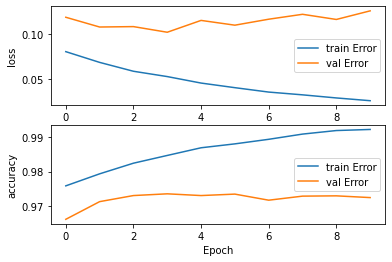

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.subplot(2,1,1)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.plot(hist['epoch'], hist['loss'], label="train Error")
plt.plot(hist['epoch'], hist['val_loss'], label="val Error")
plt.legend()

plt.subplot(2,1,2)
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.plot(hist['epoch'], hist['acc'], label="train Error")
plt.plot(hist['epoch'], hist['val_acc'], label="val Error")
plt.legend()

plt.show()

In [12]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

In [15]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16, ), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_4 (Glob (None, 16)                0   

In [17]:
# 모델 앙상블 기법
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128, ))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

In [19]:
# functioanl API 의 다중 입력, 출력
num_tags = 12
num_words = 10000
num_departments = 4

title_input = keras.Input(shape=(None, ), name="title")
body_input = keras.Input(shape=(None,), name="body")
tags_input = keras.Input(shape=(num_tags,), name="tags")

title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

x = layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, name="priority")(x)
department_pred = layers.Dense(num_departments, name="department")(x)

model = keras.Model(
    inputs = [title_input, body_input, tags_input],
    outputs = [priority_pred, department_pred],
)

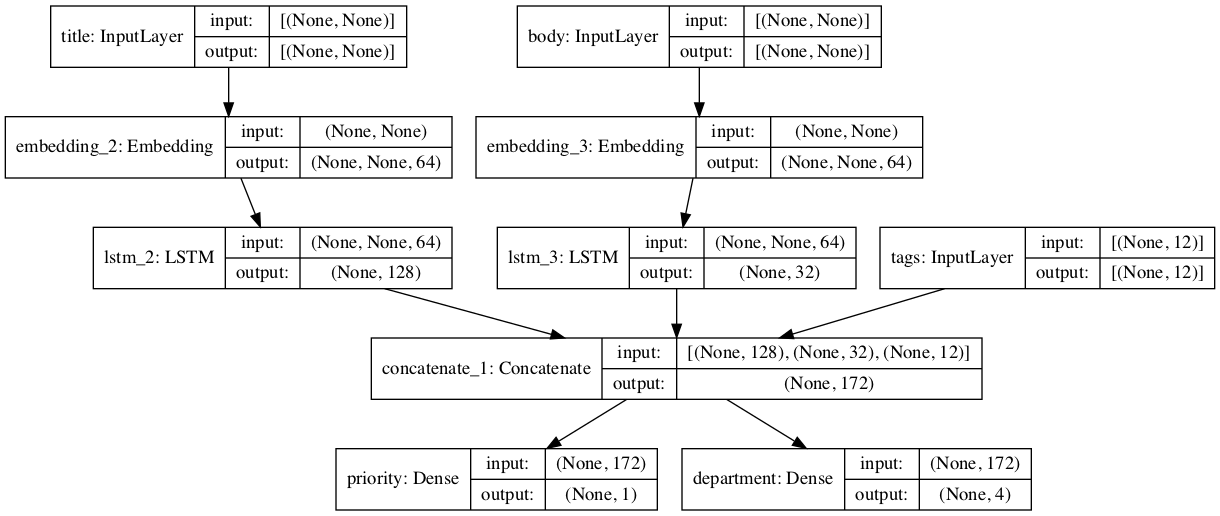

In [20]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [25]:
# 컴파일시 각 output에 서로다른 손실을 할당할 수 있다. 
model.compile(
    optimizer = keras.optimizers.RMSprop(1e-3),
    loss = {
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights = [1.0, 0.2],
)

In [27]:
title_data = np.random.randint(num_words, size = (1280, 10))
body_data = np.random.randint(num_words, size = (1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title" : title_data, "body" : body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 3s 20ms/step - loss: 1.2601 - priority_loss: 0.6999 - department_loss: 2.8007
Epoch 2/2
40/40 [==============================] - 1s 20ms/step - loss: 1.2544 - priority_loss: 0.6976 - department_loss: 2.7838


In [28]:
# 장난감 ResNet 모델
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_21[0][0]                  
_________________________________________________________________________________________

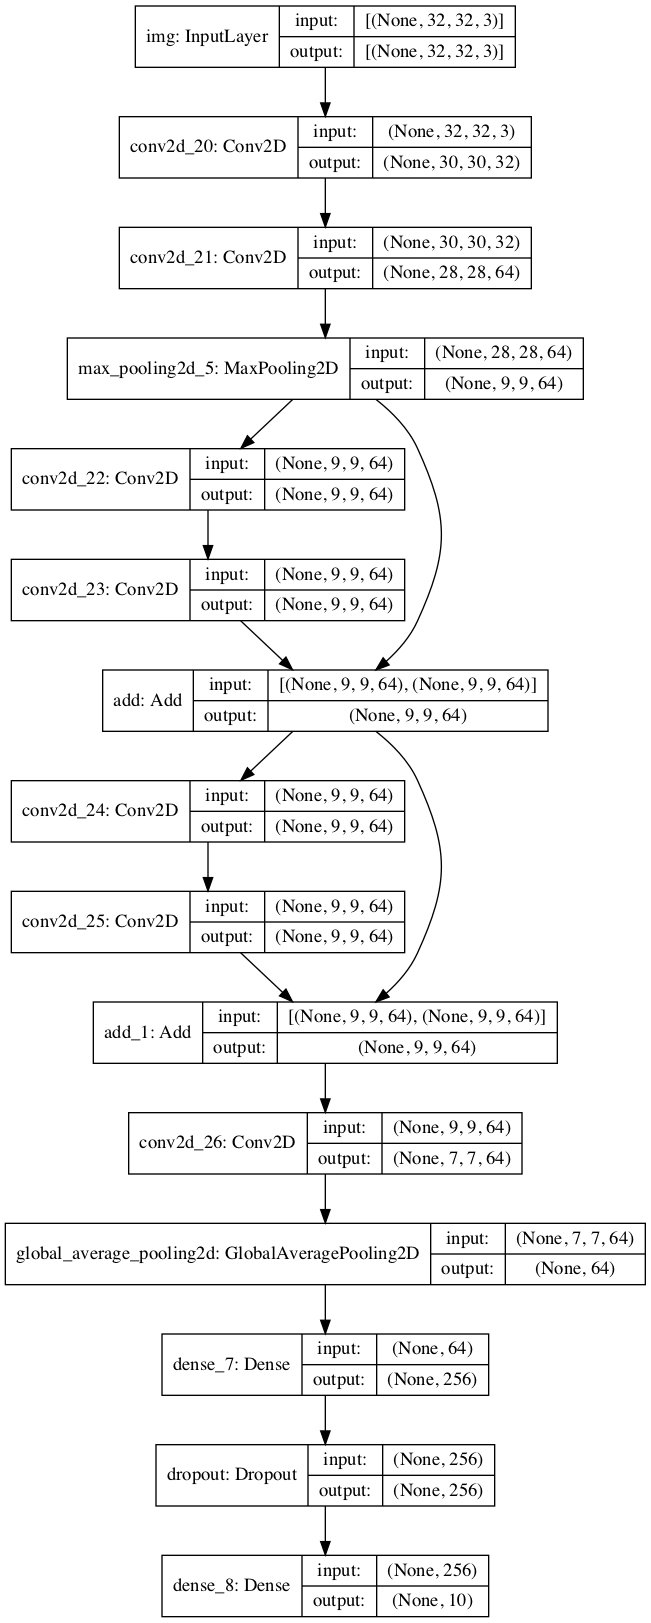

In [29]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [31]:
# 모델 훈련
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)    # one-hot encoding
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer = keras.optimizers.RMSprop(1e-3),
    loss = keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

13/13 [==============================] - 2s 106ms/step - loss: 2.3045 - acc: 0.1025 - val_loss: 2.2965 - val_acc: 0.1150


In [43]:
# 공유 레이어
shared_embedding = layers.Embedding(1000, 128)

text_input_a = keras.Input(shape=(None,), dtype="int32")

text_input_b = keras.Input(shape=(None,), dtype="int32")

# embedding 을 여러번 사용 가능.
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

In [44]:
# 레이어 그래프에서 노드 추출 및 재사용
vgg19 = keras.applications.VGG19()

In [45]:
features_list = [layer.output for layer in vgg19.layers]

In [46]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

img = np.random.random((1, 224, 224, 3)).astype("float32")
extracted_features = feat_extraction_model(img)

In [56]:
# 사용자 정의 레이어
# 데이터 직렬화 : 데이터를 디스크에 저장하거나 네트워크 통신에 사용하기 위한 형식으로 변환하는 것을 말한다. 
# 역직렬화는 직렬화의 반대로 디스크에 저장된 데이터를 읽거나, 통신으로 수신한 데이터를 메모리에 쓸 수 있도록 변환하는 작업.

class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units
    
    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer = "random_normal",
            trainable = True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )
    
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
    
    def get_config(self):
        return {"units": self.units}
    

inputs = keras.Input((4, ))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)

# input, output에 관한 설정
config = model.get_config()

new_model = keras.Model.from_config(config, custom_objects={"CustomDense": CustomDense})
new_model.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
custom_dense_16 (CustomDense (None, 10)                50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Functional API vs subclassing
# Functional API가 덜 복잡하다.

# Functional API
inputs = keras.Input(shape=(32,))
x = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10)(x)
mlp = keras.Model(inputs, outputs)

In [58]:
# subclassing

class MLP(keras.Model):
    
    def __init__(self, **kwargs):
        super(MLP, self).__init__(**kwargs)
        self.dense_1 = layers.Dense(64, activation='relu')
        self.dense_2 = layers.Dense(10)
    
    def call(self, inputs):
        x = self.dense_1(inputs)
        return self.dense_2(x)

mlp = MLP()

_ = mlp(tf.zeros((1, 32)))

In [68]:
# mix and match api 스타일. sequential, functional, subclassing 등 서로 상호작용하여 사용할 수 있다.
units = 32
timesteps = 10
input_dim = 5
batch_size = 16


class CustomRNN(layers.Layer):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        self.classifier = layers.Dense(1)
    
    def call(self, inputs):
        outputs = []
        # print(inputs.shape)
        state = tf.zeros(shape=(inputs.shape[0], self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        # print(outputs)
        features = tf.stack(outputs, axis=1)
        print(features.shape)
        return self.classifier(features)

    
inputs = keras.Input(batch_shape=(batch_size, timesteps, input_dim))
x = layers.Conv1D(32, 3)(inputs)
outputs = CustomRNN()(x)

model = keras.Model(inputs, outputs)

rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, timesteps, input_dim)))

model.summary()

(16, 8, 32)
(1, 10, 32)
Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(16, 10, 5)]             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (16, 8, 32)               512       
_________________________________________________________________
custom_rnn_6 (CustomRNN)     (16, 8, 1)                2145      
Total params: 2,657
Trainable params: 2,657
Non-trainable params: 0
_________________________________________________________________
